###Univariate Time Series Forecasting

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	x, y =[],[]#in form of list
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features # this basically says i=0 and + 3 = 3rd index
		# check if we are beyond the sequence or see if we reached end of this list
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		x.append(seq_x)
		y.append(seq_y)
	return np.array(x), np.array(y)

In [ ]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210,221,237,253]
# choose a number of time steps
n_steps = 3
# split into samples
x, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(x),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]
 [187 196 210]
 [196 210 221]
 [210 221 237]]
[146 158 172 187 196 210 221 237 253]


(None, None)

In [ ]:
x.shape# 9 indicates that no of records and 3 basically indicates the no of timestamp

(9, 3)

In [ ]:
#after devloping any lstm model first thing is to remmember is that covert dimension/reshape  into 3 dimensions

#Syntax ----> reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

###Building LSTM MODEL

In [ ]:
#building the model
model=Sequential()#creating the sequential layer
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(n_steps,n_features)))#50 is basically hidden neurons
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))# this is basically neural network node or output node
model.compile(optimizer='adam',loss='mse')
model.fit(x,y,epochs=300,verbose=1)#verbose is basically is showing the backend the running epochs task or say model building process

Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 37187.1484
Epoch 2/300
1/1 [==============================] - 0s 951us/step - loss: 36123.1016
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 35139.5469
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 34202.6211
Epoch 5/300
1/1 [==============================] - 0s 864us/step - loss: 33334.2656
Epoch 6/300
1/1 [==============================] - 0s 859us/step - loss: 32551.2734
Epoch 7/300
1/1 [==============================] - 0s 865us/step - loss: 31839.2109
Epoch 8/300
1/1 [==============================] - 0s 854us/step - loss: 31171.5977
Epoch 9/300
1/1 [==============================] - 0s 871us/step - loss: 30530.2402
Epoch 10/300
1/1 [==============================] - 0s 1ms/step - loss: 29905.9238
Epoch 11/300
1/1 [==============================] - 0s 1ms/step - loss: 29291.7461
Epoch 12/300
1/1 [==============================] - 0s 837us/step - loss: 28683.2227

In [ ]:
# demonstrate prediction for next 12 days
x_input = np.array([210,221,237])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<12):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)


[250.69041]
1 day input [221.         237.         250.69041443]
1 day output [[264.78372]]
2 day input [237.         250.69041443 264.78372192]
2 day output [[280.99783]]
3 day input [250.69041 264.78372 280.99783]
3 day output [[296.57224]]
4 day input [264.78372 280.99783 296.57224]
4 day output [[313.09604]]
5 day input [280.99783 296.57224 313.09604]
5 day output [[330.78265]]
6 day input [296.57224 313.09604 330.78265]
6 day output [[348.75592]]
7 day input [313.09604 330.78265 348.75592]
7 day output [[367.77335]]
8 day input [330.78265 348.75592 367.77335]
8 day output [[387.76248]]
9 day input [348.75592 367.77335 387.76248]
9 day output [[408.52264]]
10 day input [367.77335 387.76248 408.52264]
10 day output [[430.38098]]
11 day input [387.76248 408.52264 430.38098]
11 day output [[453.2842]]
[250.69041, 264.78372, 280.99783, 296.57224, 313.09604, 330.78265, 348.75592, 367.77335, 387.76248, 408.52264, 430.38098, 453.2842]


In [ ]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210, 221, 237, 253]

In [ ]:
len(timeseries_data)

12

In [ ]:
lst_output

[250.69041,
 264.78372,
 280.99783,
 296.57224,
 313.09604,
 330.78265,
 348.75592,
 367.77335,
 387.76248,
 408.52264,
 430.38098,
 453.2842]

####VISUALIZE ANALYSIS OF TIME SERIES FORECASTING

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(0,12)
day_pred=np.arange(12,24)

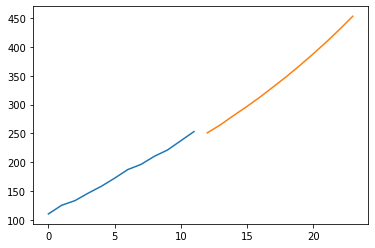

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)